In [1]:
pip install statsmodels

You should consider upgrading via the 'c:\users\osman\appdata\local\programs\python\python38-32\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import pylab
from scipy.stats import skew, kurtosis

In [3]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1]:
df.isnull().sum()

NameError: name 'df' is not defined

'Id' and columns with a NULL data count of less than 0.3 should be removed.

In [4]:
df2 = df[[column for column in df if df[column].isnull().sum() / len(df) < 0.3]]
del df2['Id']
print("Dropped columns:")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")

Dropped columns:
Id, Alley, FireplaceQu, PoolQC, Fence, MiscFeature, 

In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

# Normal Distribution

We only need numeric variables to test the normal distribution.

In [5]:
# df_num = df2.select_dtypes(include = ['float64', 'int64'])
df_num = df2.select_dtypes(include = ['number'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


## Graphical Methods:

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


c:\users\osman\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'SalePrice')

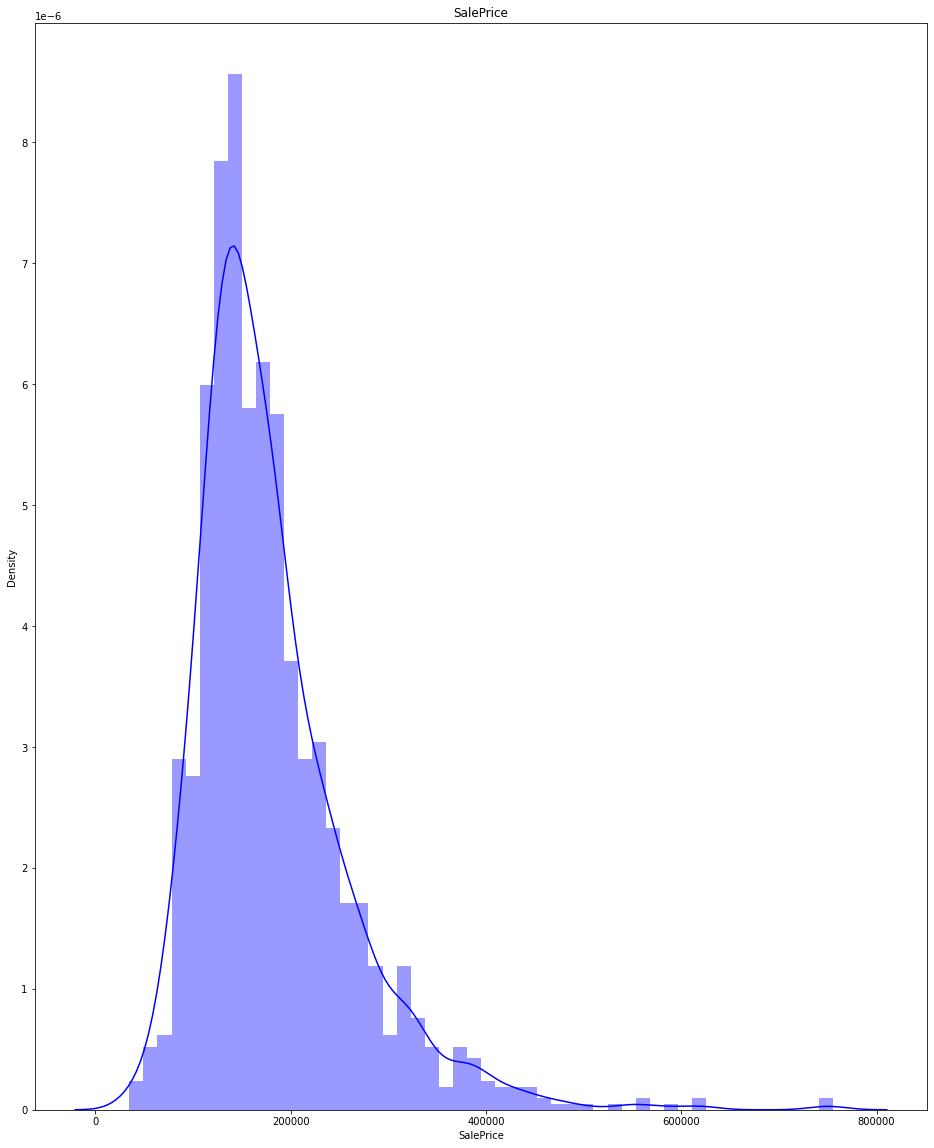

In [18]:
print(df['SalePrice'].describe())
plt.figure(figsize=(16, 20))
sns.distplot(df['SalePrice'], color='b', bins=50).set_title('SalePrice')

Text(0.5, 0.98, 'Histogram Plots for all Numeric Variables')

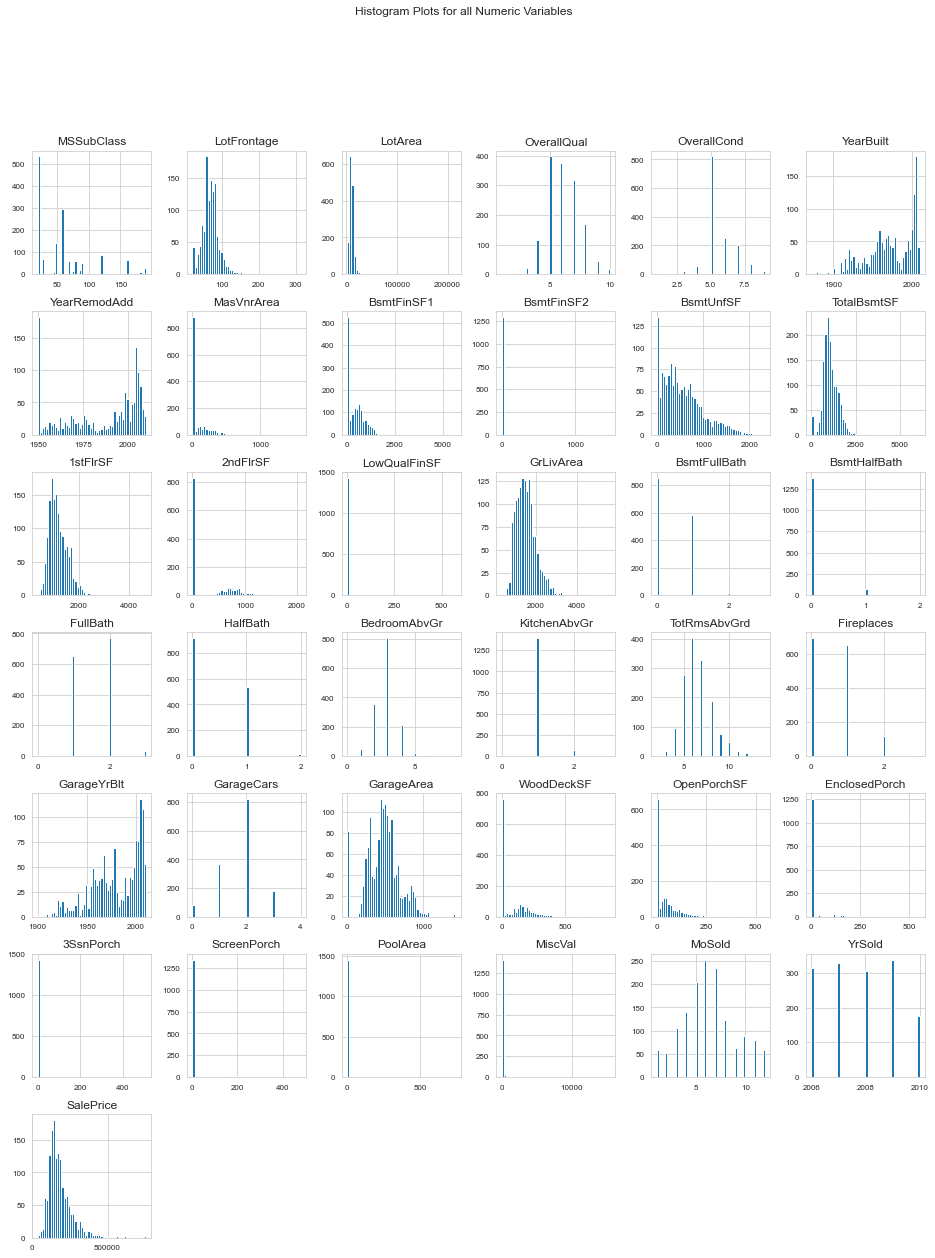

In [19]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.suptitle("Histogram Plots for all Numeric Variables")

The distributions of the 'LotFrontage', '1stFlrSF', 'TotalBsmtSF', 'GarageArea' variables are similar to the SalePrice variable. Let's look at these variables in more detail.

In [41]:
def variable_vis(df, var_list):
    for i in var_list:
        plt.figure(figsize=(16, 20))
        sns.distplot(df[str(i)], color='b', bins=50).set_title(str(i))

c:\users\osman\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\osman\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\osman\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to us

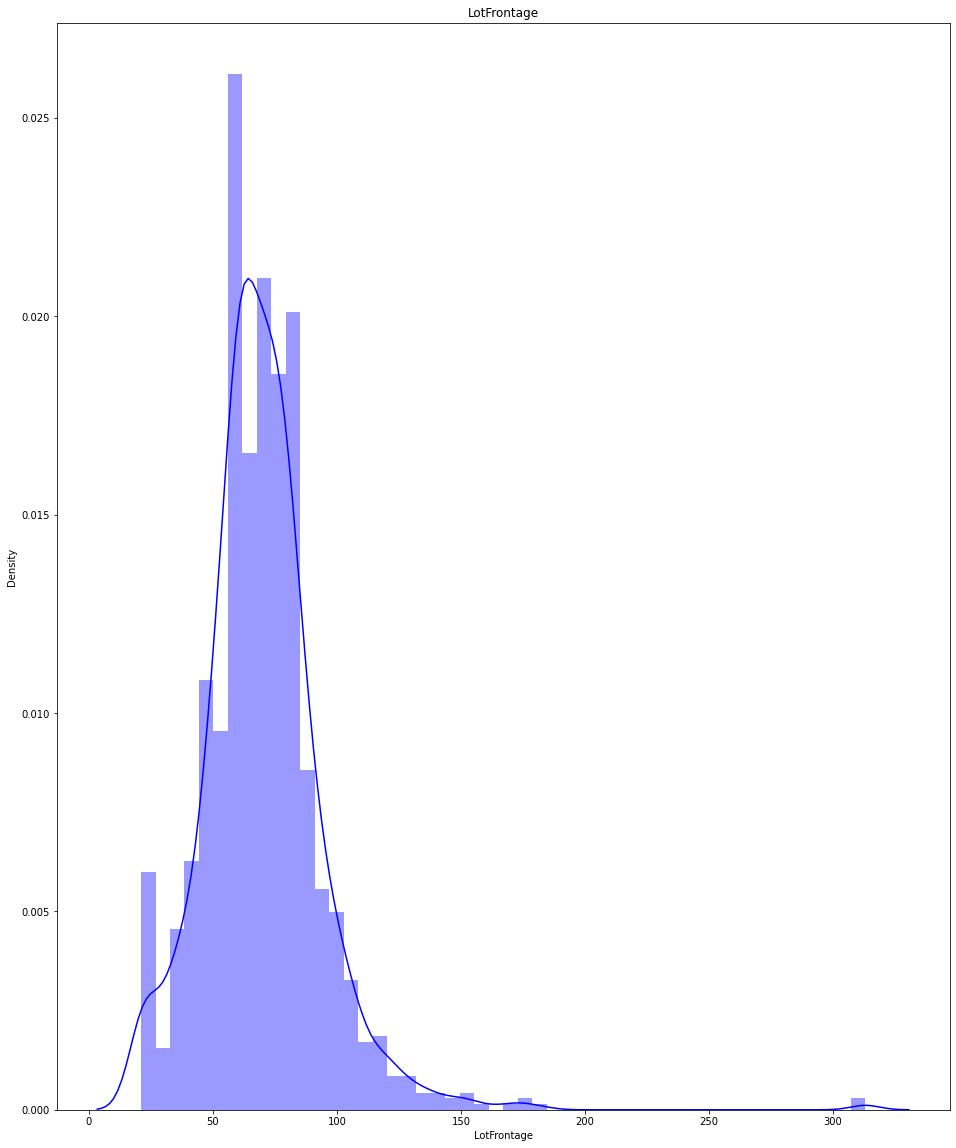

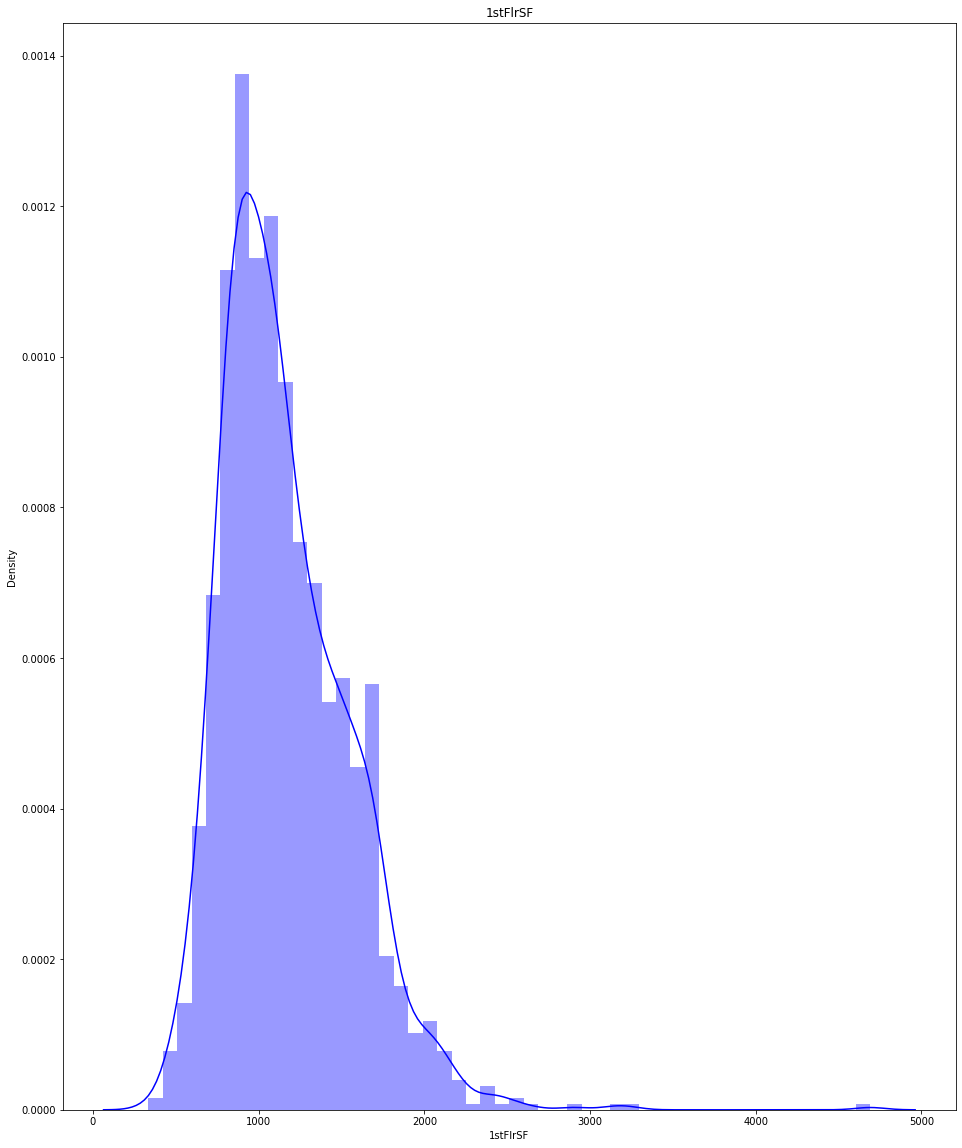

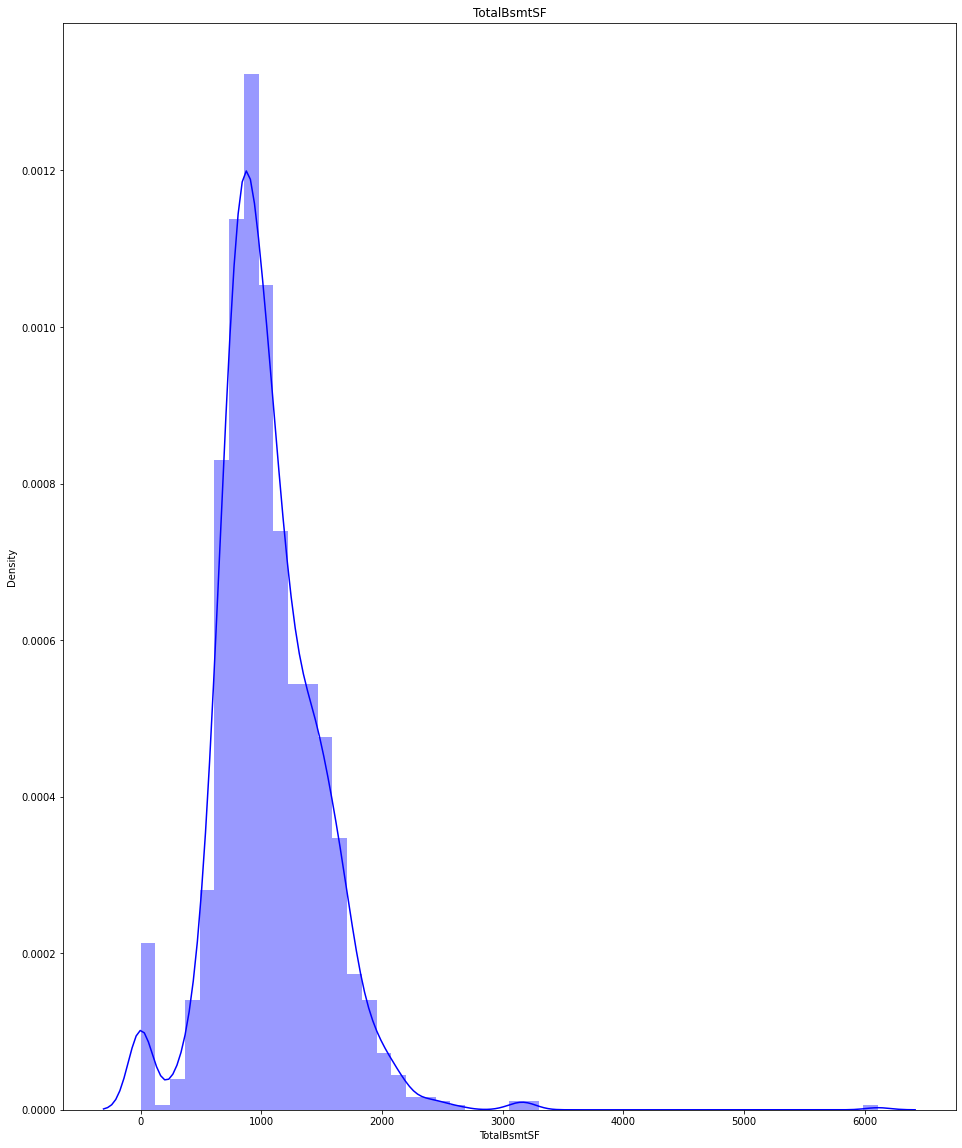

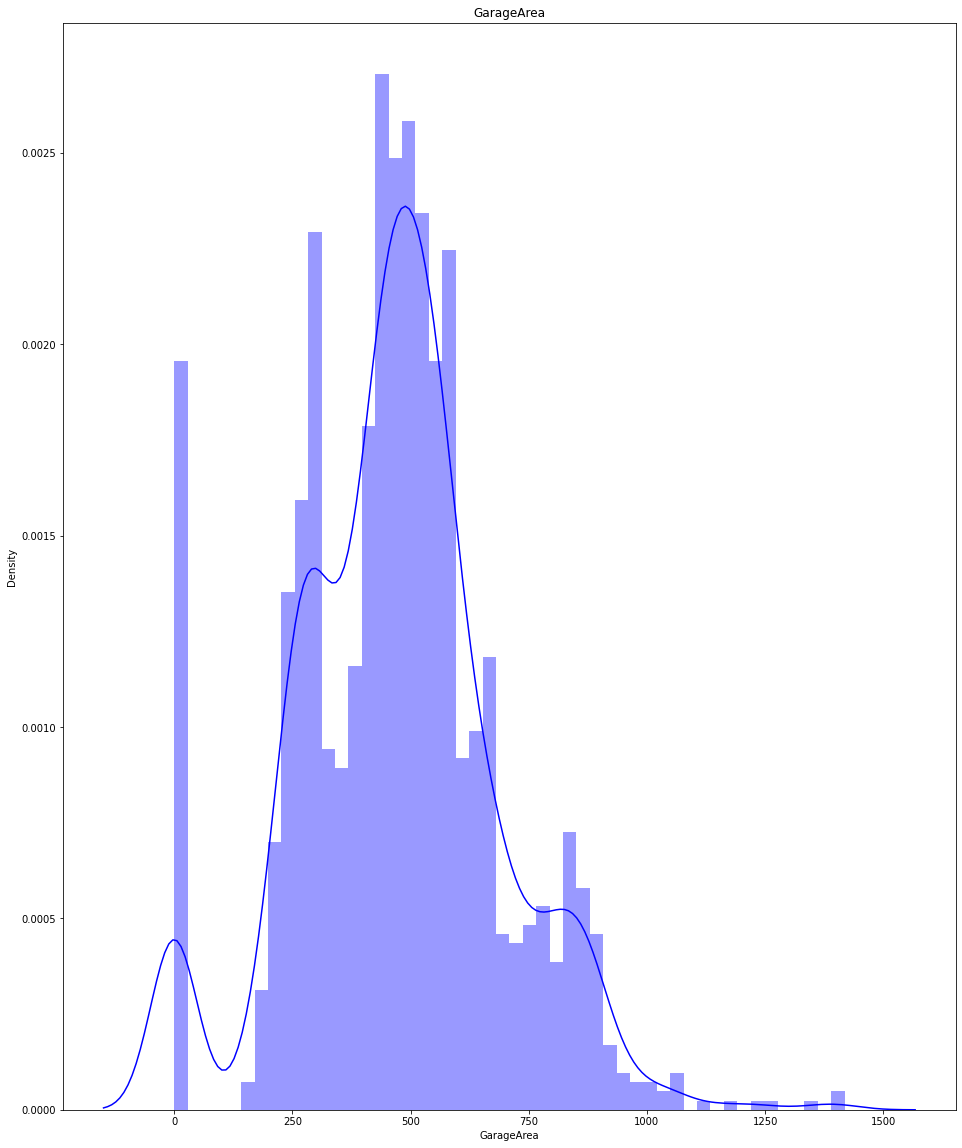

In [42]:
var_list = ('LotFrontage', '1stFlrSF', 'TotalBsmtSF', 'GarageArea')
variable_vis(df_num, var_list)

## Statistical Tests

For normal distribution the skewness should be 0 and the kurtosis should be 3. 

For Pearson’s definition, the kurtosis value for normal distribution is 3. That's why we should add  'fisher=False'  to the code. 

In [43]:
for i in df_num.columns:
    print(i,'skewness is: ',skew(df_num[[i]]))
    print(i,'kurtosis is: ',kurtosis(df_num[[i]], fisher=False))
    print('------------------------------------------------------')

MSSubClass skewness is:  [1.40621011]
MSSubClass kurtosis is:  [4.57067477]
------------------------------------------------------
LotFrontage skewness is:  [nan]
LotFrontage kurtosis is:  [nan]
------------------------------------------------------
LotArea skewness is:  [12.19514213]
LotArea kurtosis is:  [205.54379275]
------------------------------------------------------
OverallQual skewness is:  [0.21672098]
OverallQual kurtosis is:  [3.09185655]
------------------------------------------------------
OverallCond skewness is:  [0.69235521]
OverallCond kurtosis is:  [4.09852123]
------------------------------------------------------
YearBuilt skewness is:  [-0.61283072]
YearBuilt kurtosis is:  [2.55784515]
------------------------------------------------------
YearRemodAdd skewness is:  [-0.5030445]
YearRemodAdd kurtosis is:  [1.72800086]
------------------------------------------------------
MasVnrArea skewness is:  [nan]
MasVnrArea kurtosis is:  [nan]
-----------------------------

#### Let's look at every variable skewness and kurtosis results: 

- MSSubClass has a thick left tail and a sharp peak. That means Negative skewness and Leptokurtic distribution.

- LotArea has a thick left tail and a sharp peak. That means Negative skewness and Leptokurtic distribution.

- OverallQual has no tail, flatness, sharpness. That means Symmetrical skewnessand and Mesakurtic(Normal) distribution.

- OverallCond has no tail and has a sharp peak. That means Symmetrical skewnessand and Leptokurtic distribution.

- YearBuilt has no tail, flatness, sharpness. That means Symmetrical skewnessand and Mesakurtic(Normal) distribution.

- YearRemodAdd has no tail and has a quite flatness. That means Symmetrical skewnessand and Platykurtic distribution.

- BsmtFinSF1 has a thick left tail and a sharp peak. That means Negative skewness and Leptokurtic distribution.

- BsmtFinSF2 has a thick left tail and a sharp peak. That means Negative skewness and Leptokurtic distribution.

- TotalBsmtSF has a thick left tail and a sharp peak. That means Negative skewness and Leptokurtic distribution.

- 1stFlrSF has a thick left tail and a sharp peak. That means Negative skewness and Leptokurtic distribution.

- 2ndFlrSF has no tail, flatness, sharpness. That means Symmetrical skewnessand and Mesakurtic(Normal) distribution.

- LowQualFinSF has a thick left tail and a sharp peak. That means Negative skewness and Leptokurtic distribution.

- GrLivArea has a thick left tail and a sharp peak. That means Negative skewness and Leptokurtic distribution.

- BsmtFullBath has no tail and has a quite flat. That means Symmetrical skewnessand and Platykurtic distribution.

- BsmtHalfBath has a thick left tail and a sharp peak. That means Negative skewness and Leptokurtic distribution.

- FullBath has no tail and has a quite flat. That means Symmetrical skewnessand and Platykurtic distribution.

- HalfBath has no tail and has a quite flat. That means Symmetrical skewnessand and Platykurtic distribution.

- BedroomAbvGr has no tail and has a quite sharp peak. That means Symmetrical skewnessand and Leptokurtic distribution.

- KitchenAbvGr has a thick left tail and a sharp peak. That means Negative skewness and Leptokurtic distribution.

- TotRmsAbvGrd has a thick left tail and a quite sharp peak. That means Negative skewness and Leptokurtic distribution.

- Fireplaces has no tail, flatness, sharpness. That means Symmetrical skewnessand and Mesakurtic(Normal) distribution.

- GarageCars has no tail, flatness, sharpness. That means Symmetrical skewnessand and Mesakurtic(Normal) distribution.

- GarageArea has no tail and has a quite sharp peak. That means Symmetrical skewnessand and Leptokurtic distribution.

- WoodDeckSF has a thick left tail and a sharp peak. That means Negative skewness and Leptokurtic distribution.

- OpenPorchSF has a thick left tail and a sharp peak. That means Negative skewness and Leptokurtic distribution.

- EnclosedPorch has a thick left tail and a sharp peak. That means Negative skewness and Leptokurtic distribution.

- 3SsnPorch has a thick left tail and a sharp peak. That means Negative skewness and Leptokurtic distribution.

- ScreenPorch has a thick left tail and a sharp peak. That means Negative skewness and Leptokurtic distribution.

- PoolArea has a thick left tail and a sharp peak. That means Negative skewness and Leptokurtic distribution.

- MiscVal has a thick left tail and a sharp peak. That means Negative skewness and Leptokurtic distribution.

- MoSold has no tail, flatness, sharpness. That means Symmetrical skewnessand and Mesakurtic(Normal) distribution.

- YrSold has no tail and has a quite flat. That means Symmetrical skewnessand and Platykurtic distribution.

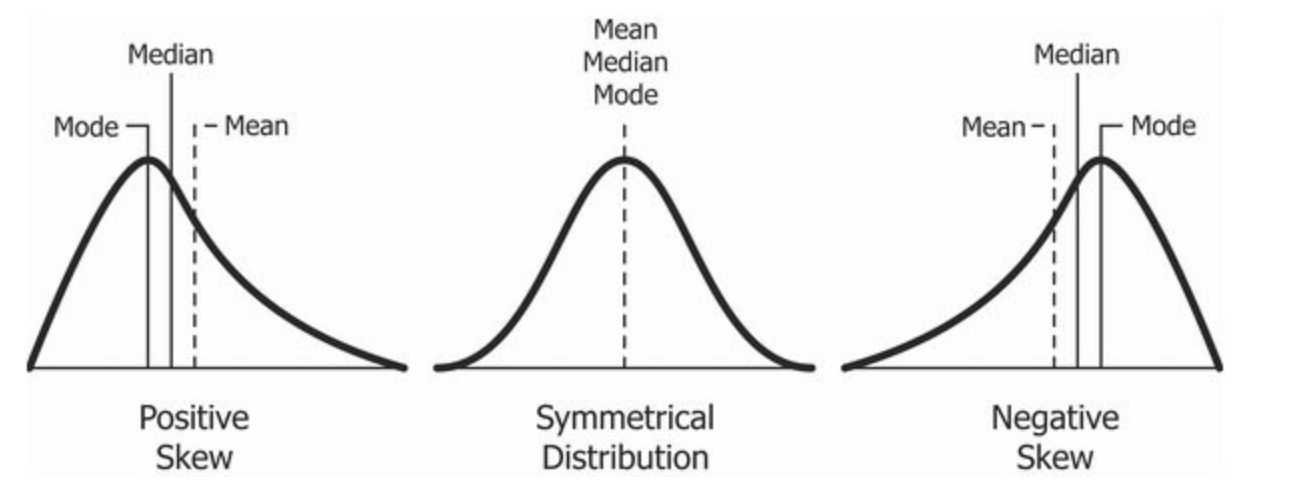

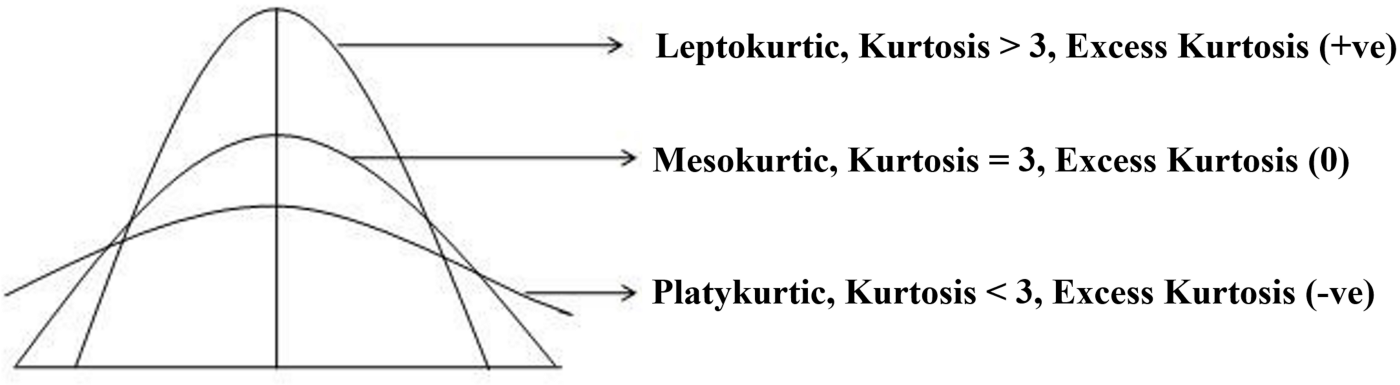

Positive skewness: Thicker right tail and mode < median < mean.

Negative skewness: Thicker left tail and mean < median < mode.

Symmetrical skewness: mode = median = mean.


##### Excess Kurtosis for Normal Distribution = 3 – 3 = 0
Types of Excess Kurtosis:

    1. Positive excess kurtosis: The distribution has a sharp peak and is called a Leptokurtic distribution.
    
    2. Negative excess kurtosis: The distribution has quite flat and is called a Platykurtic distribution.

    3. The distribution is neither flat nor sharp. and is called the Mesakurtic(Normal) distribution.

In [44]:
alpha = 0.05

#### Jarque-Bera
This test looks for skewness = 0 and kurtosis = 3 (normal distribution values). The test statistic is not always negative. It shows that data does not have a normal distribution if it is far from zero.

H0: The sample comes from a normal distribution. S=0 and K=3.

H1: The sample is not coming from normal distribution. 

In [45]:
for i in df_num.columns:
    print ([i])
    a,b= stats.jarque_bera(df[[i]])
    print ("Statistics", a, "p-value", b)
    if b < alpha:  
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")

['MSSubClass']
Statistics 631.2508774852986 p-value 0.0
The null hypothesis can be rejected
['LotFrontage']
Statistics nan p-value nan
The null hypothesis cannot be rejected
['LotArea']
Statistics 2531814.8318310115 p-value 0.0
The null hypothesis can be rejected
['OverallQual']
Statistics 11.942164422967657 p-value 0.002551478684797881
The null hypothesis can be rejected
['OverallCond']
Statistics 190.0537880766397 p-value 0.0
The null hypothesis can be rejected
['YearBuilt']
Statistics 103.27960269659029 p-value 0.0
The null hypothesis can be rejected
['YearRemodAdd']
Statistics 160.0036433055817 p-value 0.0
The null hypothesis can be rejected
['MasVnrArea']
Statistics nan p-value nan
The null hypothesis cannot be rejected
['BsmtFinSF1']
Statistics 8152.889675716796 p-value 0.0
The null hypothesis can be rejected
['BsmtFinSF2']
Statistics 28828.82231021131 p-value 0.0
The null hypothesis can be rejected
['BsmtUnfSF']
Statistics 219.0501155438228 p-value 0.0
The null hypothesis can be

#### Kolmogorov-Smirnov
This is a non-parametric test. That means, it has no assumption about the distribution of the data. It is tested if samples X1, X2,..., Xn and Y1, Y2,..., Yn come from the same distribution.

H0: Fx(z) is equal to Fy(z)

H1: Fx(z) is not equal to Fy(z)

In [46]:
for i in df_num.columns:
    print ([i])
    a,b= stats.kstest(df_num[[i]], 'norm')
    print ("Statistics", a, "p-value", b)
    if b < alpha:  
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")

['MSSubClass']
Statistics 1.0 p-value 0.0
The null hypothesis can be rejected
['LotFrontage']
Statistics nan p-value nan
The null hypothesis cannot be rejected
['LotArea']
Statistics 1.0 p-value 0.0
The null hypothesis can be rejected
['OverallQual']
Statistics 1.0 p-value 0.0
The null hypothesis can be rejected
['OverallCond']
Statistics 1.0 p-value 0.0
The null hypothesis can be rejected
['YearBuilt']
Statistics 1.0 p-value 0.0
The null hypothesis can be rejected
['YearRemodAdd']
Statistics 1.0 p-value 0.0
The null hypothesis can be rejected
['MasVnrArea']
Statistics nan p-value nan
The null hypothesis cannot be rejected
['BsmtFinSF1']
Statistics 1.0 p-value 0.0
The null hypothesis can be rejected
['BsmtFinSF2']
Statistics 1.0 p-value 0.0
The null hypothesis can be rejected
['BsmtUnfSF']
Statistics 1.0 p-value 0.0
The null hypothesis can be rejected
['TotalBsmtSF']
Statistics 1.0 p-value 0.0
The null hypothesis can be rejected
['1stFlrSF']
Statistics 1.0 p-value 0.0
The null hypothes

The result of the Jarqu-Bera test statistic and Kolmogorov-Smirnov test statistic are, for LotFrontage, MasVnrArea, GarageYrBlt variables the null hypothesis cannot be rejected. But for all other variables can be rejected. The fact that the test statistics and p-values were NAN could explain why the null hypothesis can not be rejected for LotFrontage, MasVnrArea, GarageYrBlt variables.

Early results can be accessed using graph approaches for testing normality. The statistical results of the tests provide scientific information.

# Heteroskedasticity

# Autocorrelation python